In [14]:
from func_model_methods  import *
from func_sampling_methods import *
from func_data import*

In [15]:
df=pd.read_csv(r"creditcard.csv")

df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [16]:
'''df.rename(columns={"Diabetes_012": "Diabetes"}, inplace=True)
# Dropping rows where Diabetes == 1
df.drop(df[df['Diabetes'] == 1].index, inplace=True)

map = {
    0: 0,
    2: 1,
    
}
df["Diabetes"] = df["Diabetes"].replace(map)'''

'df.rename(columns={"Diabetes_012": "Diabetes"}, inplace=True)\n# Dropping rows where Diabetes == 1\ndf.drop(df[df[\'Diabetes\'] == 1].index, inplace=True)\n\nmap = {\n    0: 0,\n    2: 1,\n    \n}\ndf["Diabetes"] = df["Diabetes"].replace(map)'

In [17]:
print(df.shape)
df.dropna # odrzucamy wiersze z wartościami NaN
df.shape

(284807, 31)


(284807, 31)

In [18]:
#df = df.sample(n=30000)

In [19]:
# zmienna określana Diabetes
Y = df['Class'].values
X = df.drop(['Class'], axis=1)

print(X.shape)

(284807, 30)


In [20]:
n_positive,n_negative=get_value_distribution(Y)

Number of positive: 492, number of negative: 284315


In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
data_split=dataset_split(X,Y,test_size=0.15)

In [23]:
#listy samplingów do sprawdzenia
func_sampling=[data_undersampling,data_near_miss]

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 10}
Best Threshold=1.000000, G-mean=0.078


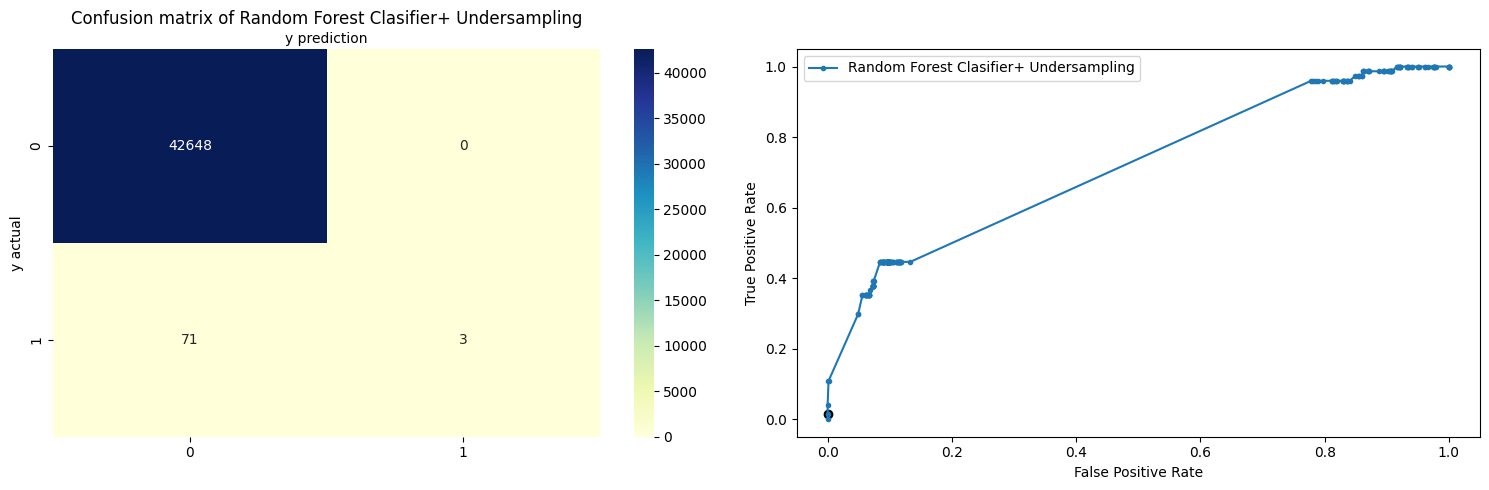

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\Users\karol\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


{'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 10}
Best Threshold=1.000000, G-mean=0.003


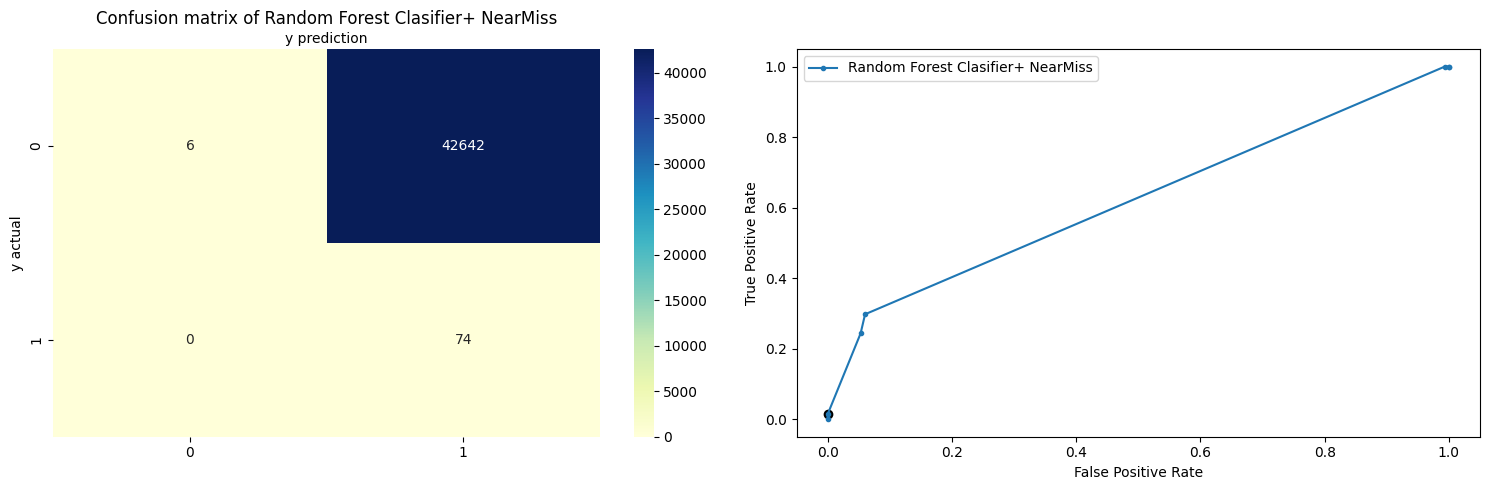

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


,Random Forest,Recall 0,Precision 0,Recall 1,Precision 1,F1 Score,Accuracy,Roc Auc
0,Undersampling,1.000000,0.998338,0.040541,1.000000,0.077922,0.998338,0.715870
1,NearMiss,0.000141,1.000000,1.000000,0.001732,0.003459,0.001873,0.620569


In [24]:
params_random_forest={'max_depth': [5, 10, None],
                    'min_samples_split': [10, 30, 50],
                    'min_samples_leaf': [1, 2, 3]}
random_forest(func_sampling,params_random_forest,data_split)

In [12]:
params_xgb_boost= {
        'min_child_weight': [2, 5],
        'gamma': [0.5, 1],
        'subsample': [0.6,1.0],
        'max_depth': [3, 6, 10]
        }

In [13]:
xgb_boost_classifier(func_sampling,params_xgb_boost,data_split)


KeyboardInterrupt: 

In [ ]:

paramas_svc={"C": [1,5,7],
            "gamma":[0.1,0.01,1e-3],
            "kernel":["rbf",'sigmoid','poly']
            }
svc(func_sampling,paramas_svc,data_split)

KeyboardInterrupt: 